**Bitcoin: Price Prediction**

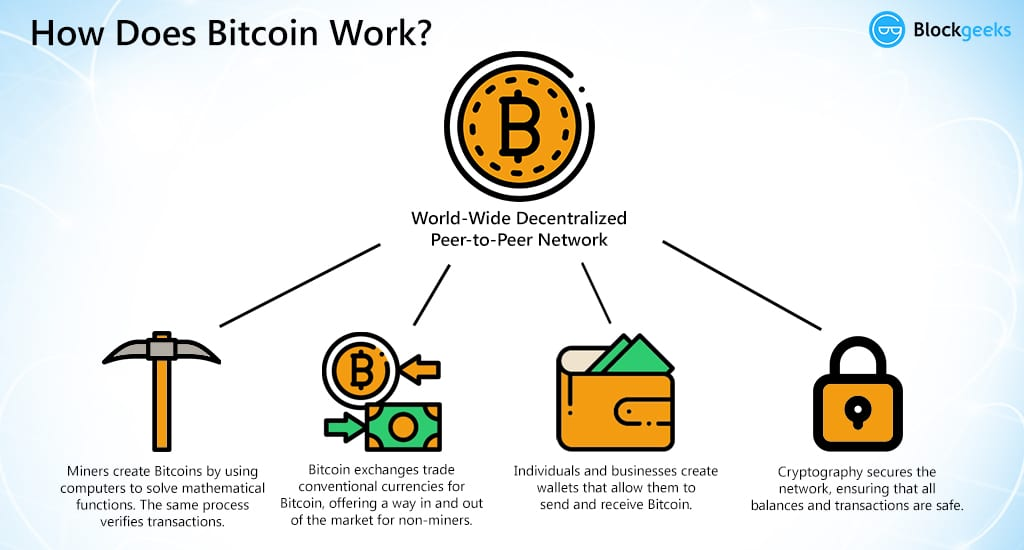

Bitcoin (₿) is a cryptocurrency invented in 2008 by an unknown person or group of people. The currency began use in 2009 when its implementation was released as open-source software. Bitcoin is a decentralized digital currency, without a central bank or single administrator, that can be sent from user to user on the peer-to-peer bitcoin network without the need for intermediaries. There are no physical bitcoins. Each Bitcoin is basically a computer file which is stored in a 'digital wallet' app on a smartphone or computer. Unlike fiat currency, bitcoin is created, distributed, traded, and stored with the use of a decentralized ledger system, known as a blockchain. This makes it possible to trace the history of Bitcoins to stop people from spending coins they do not own, making copies or undo-ing transactions.

Bitcoin is now gaining popularity and is widely traded on stock exchanges.

In [ ]:
import io
from io import StringIO
from google.colab import files 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, SimpleRNN, Dropout,Flatten, TimeDistributed, InputLayer, Conv1D
from keras.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [ ]:

uploaded = files.upload()

Saving bitstampUSD_1-min_data_2012-01-01_to_2020-12-31.csv to bitstampUSD_1-min_data_2012-01-01_to_2020-12-31.csv


In [ ]:
df=pd.read_csv('/content/bitstampUSD_1-min_data_2012-01-01_to_2020-12-31.csv')
df["date"]=pd.to_datetime(df["Timestamp"],unit="s").dt.date

In [ ]:
#####for use in marc's part of the code######
df_m = df.copy()
group_m=df_m.groupby("date")
data_m=group_m["Weighted_Price"].mean()

In [ ]:
df.tail(5)

Timestamp      Open  ...  Weighted_Price        date
4727772  1609372560  28801.47  ...    28806.429798  2020-12-30
4727773  1609372620  28829.42  ...    28846.441863  2020-12-30
4727774  1609372680  28850.49  ...    28879.056266  2020-12-30
4727775  1609372740  28910.54  ...    28893.695831  2020-12-30
4727776  1609372800  28893.21  ...    28909.166061  2020-12-31

[5 rows x 9 columns]

The table above displays the last 5 data points of the entire data set. 
The Bitcoin data contain 4,727,776 data points. Timestamp indicates the times when transactions took place. As such, each day may have multiple price points. We average all the prices of the day to make sure that each day has only one price as indicated below. We use Weighted_Price as Open, High, Low and Close are highly correlated.   

## Data Visualizations

In [ ]:
group=df.groupby("date")
data=group["Weighted_Price"].mean()
data.shape
#data.isnull().sum()
print(data)

date
2011-12-31        4.471603
2012-01-01        4.806667
2012-01-02        5.000000
2012-01-03        5.252500
2012-01-04        5.208159
                  ...     
2020-12-27    27043.386470
2020-12-28    26964.020499
2020-12-29    26671.008099
2020-12-30    28141.234408
2020-12-31    28909.166061
Name: Weighted_Price, Length: 3286, dtype: float64


#### Bitcoin Price

In [ ]:
df.Timestamp = pd.to_datetime(df.Timestamp, unit='s')
df.index = df.Timestamp

# Resampling to daily frequency
df.index = df.Timestamp
df = df.resample('D').mean()

# Resampling to monthly frequency
df_month = df.resample('M').mean()

# Resampling to annual frequency
df_year = df.resample('A-DEC').mean()

# Resampling to quarterly frequency
df_Q = df.resample('Q-DEC').mean()

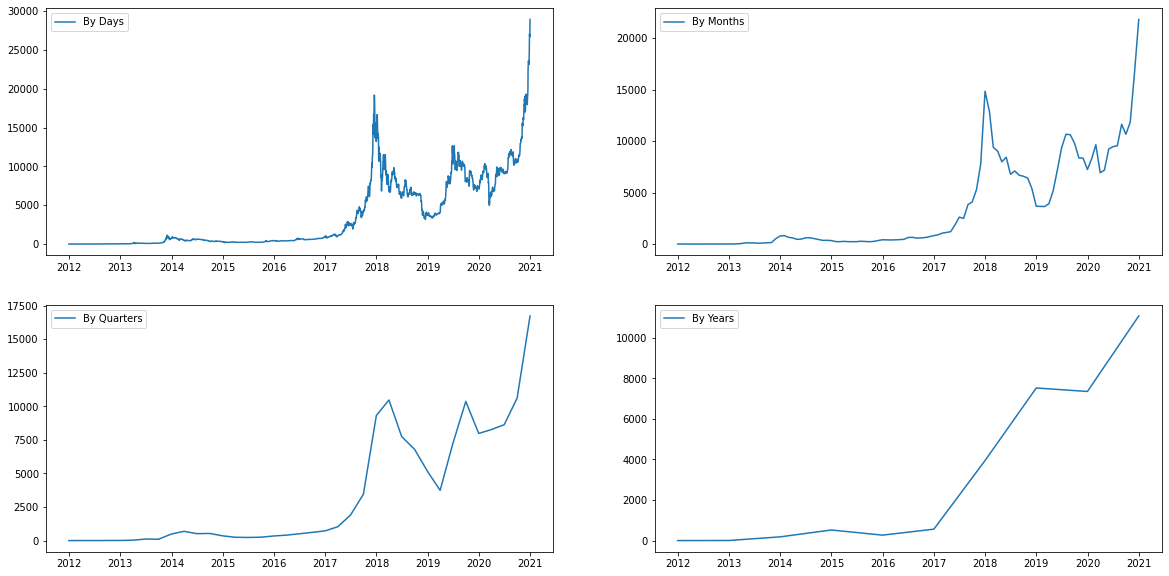

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.plot(df.Weighted_Price, '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(df_month.Weighted_Price, '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_Q.Weighted_Price, '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(df_year.Weighted_Price, '-', label='By Years')
plt.legend()


4 charts above indicate price movements by day, by month, by quarter and by year respectively (prices are averaged monthly, quarterly and yearly). From 2012 to 2017, there was no significant price movement. After 2017, the bitcoin price started moving significantly and continued to rise to its record level in 2020.  

In [ ]:
df=pd.read_csv('/content/bitstampUSD_1-min_data_2012-01-01_to_2020-12-31.csv')
df["date"]=pd.to_datetime(df["Timestamp"],unit="s").dt.date

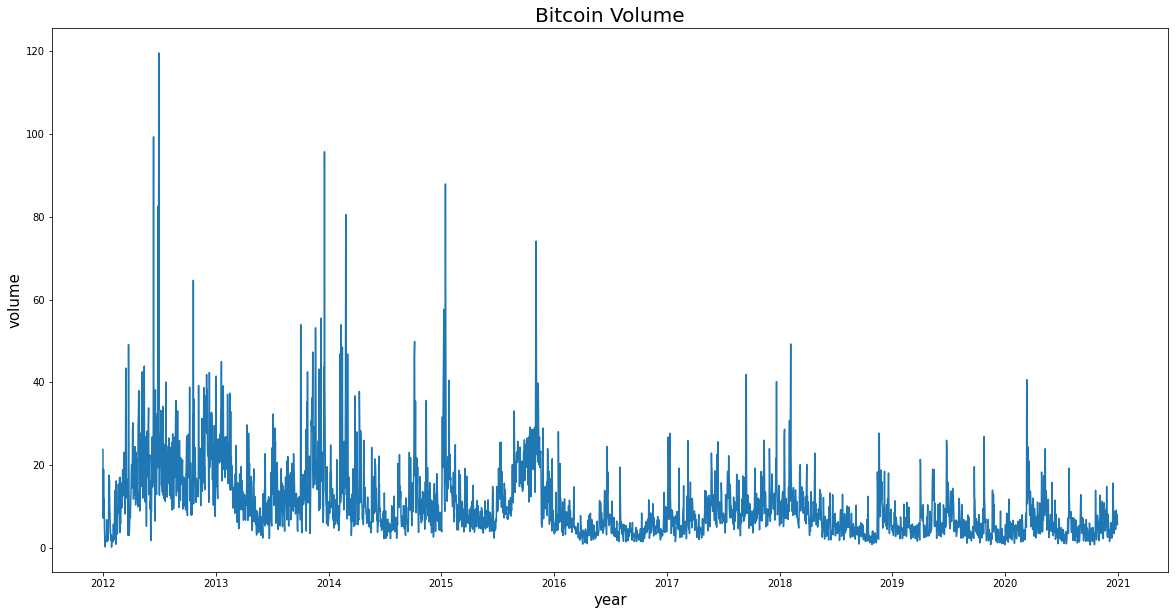

In [ ]:
group=df.groupby("date")
volume_data=group["Volume_(BTC)"].mean()
volume_data.shape
plt.figure(figsize=(20,10))
plt.plot(volume_data)
plt.title('Bitcoin Volume',fontsize=20)
plt.xlabel('year',fontsize=15)
plt.ylabel('volume',fontsize=15)
plt.show()

Moving Average with Volumes

In [ ]:
import datetime
def dateparse (time_in_secs):    
    return datetime.datetime.fromtimestamp(float(time_in_secs))

bitstamp = pd.read_csv('/content/bitstampUSD_1-min_data_2012-01-01_to_2020-12-31.csv', parse_dates=True, date_parser=dateparse, index_col=[0])

In [ ]:
resample_w = bitstamp.resample('W').agg({'Open': 'first',
                                       'High': 'max',
                                       'Low': 'min',
                                       'Close': 'last',
                                       'Volume_(BTC)': 'sum',
                                       'Volume_(Currency)': 'sum',
                                       'Weighted_Price': 'mean'})

ma_period = [13,26,52]  # 3 Months, 6 Months, 1yesr
for ma in ma_period:
    column_name = 'MA{}'.format(ma)
    resample_w[column_name] = pd.Series.rolling(resample_w['Weighted_Price'],ma).mean()

In [ ]:
from IPython.display import HTML
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.01, row_heights=[0.7, 0.3])
fig.add_trace(go.Candlestick(x=resample_w.index, open=resample_w.Open, high=resample_w.High, low=resample_w.Low, close=resample_w.Close, showlegend=False), row=1, col=1)
fig.add_trace(go.Scatter(x=resample_w.index, y=resample_w.MA13.values, mode='lines', name='MA13'), row=1, col=1)
fig.add_trace(go.Scatter(x=resample_w.index, y=resample_w.MA26.values, mode='lines', name='MA26'), row=1, col=1)
fig.add_trace(go.Scatter(x=resample_w.index, y=resample_w.MA52.values, mode='lines', name='MA52'), row=1, col=1)
fig.add_trace(go.Bar(x=resample_w.index, y=resample_w['Volume_(BTC)'], marker_color='rgb(26, 118, 255)', name='Volume'), row=2, col=1)
fig.update_layout(xaxis_rangeslider_visible=False)
#iplot(fig)
HTML(fig.to_html())

The graph indicates the prices with the moving averages (13 weeks – approximately 3monts, 26 weeks-6 months, 52 weeks-1 year).  The bottom chart displays transaction volumes. The transaction volumes were higher from 2014 to 2016 than 2018 to 2020, although the price movement was much higher during the period of 2018 to 2020. As such, there does not seem to be any correlation between transaction volumes and price movements.   

Daily Return Distribution

In [ ]:
resample_d = bitstamp.resample('D').agg({'Open': 'first',
                                       'High': 'max',
                                       'Low': 'min',
                                       'Close': 'last',
                                       'Volume_(BTC)': 'sum',
                                       'Volume_(Currency)': 'sum',
                                       'Weighted_Price': 'mean'})

In [ ]:
resample_d['Daily Return'] = resample_d['Weighted_Price'].pct_change()
print(f'Daily Return Average:{round(resample_d["Daily Return"].mean(), 4)}')
print(f'Daily Standard Deviation:{round(resample_d["Daily Return"].std(), 4)}')

Daily Return Average:0.0034
Daily Standard Deviation:0.0379


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



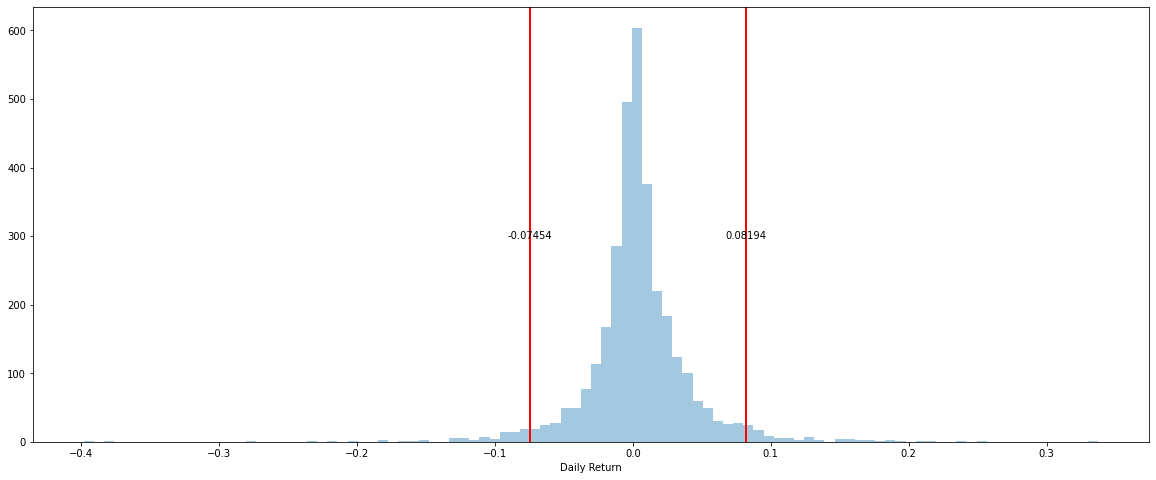

In [ ]:
plt.figure(figsize=(20, 8))
sns.distplot(resample_d['Daily Return'].dropna(), bins=100, kde=False)

plt.text(np.percentile(resample_d['Daily Return'].dropna(), 2.5), 300, "{:0.5f}".format(np.percentile(resample_d['Daily Return'].dropna(), 2.5)), ha="center", va="center")  
plt.axvline(x=np.percentile(resample_d['Daily Return'].dropna(), 2.5), linewidth=2, color='r')
plt.text(np.percentile(resample_d['Daily Return'].dropna(), 97.5), 300, "{:0.5f}".format(np.percentile(resample_d['Daily Return'].dropna(), 97.5)), ha="center", va="center",)  
plt.axvline(x=np.percentile(resample_d['Daily Return'].dropna(), 97.5), linewidth=2, color='r')

The chart above displays the distribution of daily returns. Returns cluster around zero. 95% of the time, returns fall between -7% to 8% as indicated by the red vertical line. 


## We're going to predict bitcoin price for 50 days 

### Splitting Train Test data and processing it to fit the RNN model


In [ ]:
test_dates = 50
X_train=data.iloc[:len(data)-test_dates]
X_test=data.iloc[len(X_train):]

In [ ]:
X_train.shape

(3236,)

In [ ]:
X_train=np.array(X_train)
X_train=X_train.reshape(X_train.shape[0],1)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
X_scaled=scaler.fit_transform(X_train)

In [ ]:
timestep=50
x_train=[]
y_train=[]

for i in range(timestep,X_scaled.shape[0]):
    x_train.append(X_scaled[i-timestep:i,0])
    y_train.append(X_scaled[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1) 
print("x_train shape= ",x_train.shape)
print("y_train shape= ",y_train.shape)

x_train shape=  (3186, 50, 1)
y_train shape=  (3186,)


### RNN Model

##### We're using the model to make it predict the next value, then add that value to the inputs (acting as if this predicted value had actually occurred), and use the model again to predict the following value, and so on.
##### To fight the Unstable gradient problems we used the following in the model:
*   Tanh activation function (nonsaturating activation functions (e.g., ReLU) may lead the RNN to be  more unstable during training. So we use a hyperbolic tangent function which is saturating activation function 
*   Dropout instead of Batch Normalization because BN cannot be used as efficiently with RNNs as with deep feedforward nets. 
*   Dropout rate is typically set between 20–30% in recurrent neural nets (chp 11) so we set it to 25%

*   Used Nadam optimizer which converges a lot faster


In [ ]:
modelRNN=Sequential()

modelRNN.add(SimpleRNN(128,activation="tanh",return_sequences=True,input_shape=(x_train.shape[1],1)))
modelRNN.add(Dropout(0.25))

modelRNN.add(SimpleRNN(256,activation="tanh",return_sequences=True))
modelRNN.add(Dropout(0.25))

modelRNN.add(SimpleRNN(512,activation="tanh",return_sequences=True))
modelRNN.add(Dropout(0.25))

modelRNN.add(SimpleRNN(256,activation="tanh",return_sequences=True))
modelRNN.add(Dropout(0.25))

modelRNN.add(SimpleRNN(128,activation="tanh",return_sequences=True))
modelRNN.add(Dropout(0.25))

modelRNN.add(Flatten())
modelRNN.add(Dense(1))

modelRNN.compile(optimizer="Nadam",loss="mean_squared_error")
modelRNN.fit(x_train,y_train,epochs=25,batch_size=64)



Epoch 1/25
50/50 [==============================] - 14s 160ms/step - loss: 3.6207
Epoch 2/25
50/50 [==============================] - 8s 159ms/step - loss: 0.8611
Epoch 3/25
50/50 [==============================] - 8s 158ms/step - loss: 0.7216
Epoch 4/25
50/50 [==============================] - 8s 155ms/step - loss: 0.5895
Epoch 5/25
50/50 [==============================] - 8s 155ms/step - loss: 0.5435
Epoch 6/25
50/50 [==============================] - 8s 158ms/step - loss: 0.4185
Epoch 7/25
50/50 [==============================] - 8s 160ms/step - loss: 0.4016
Epoch 8/25
50/50 [==============================] - 8s 155ms/step - loss: 0.3530
Epoch 9/25
50/50 [==============================] - 8s 160ms/step - loss: 0.2930
Epoch 10/25
50/50 [==============================] - 8s 155ms/step - loss: 0.2681
Epoch 11/25
50/50 [==============================] - 8s 158ms/step - loss: 25.5401
Epoch 12/25
50/50 [==============================] - 8s 158ms/step - loss: 0.6755
Epoch 13/25
50/50 [====

Preparing test data for prediction

In [ ]:
inputs=data[len(data)-len(X_test)-timestep:]
inputs=inputs.values.reshape(-1,1)
inputs=scaler.transform(inputs)

In [ ]:
x_test=[]
for i in range(timestep,inputs.shape[0]):
    x_test.append(inputs[i-timestep:i,0])
x_test=np.array(x_test)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [ ]:
predicted_data=modelRNN.predict(x_test)
predicted_data=scaler.inverse_transform(predicted_data)

In [ ]:
data_test=np.array(X_test)
data_test=data_test.reshape(len(data_test),1)

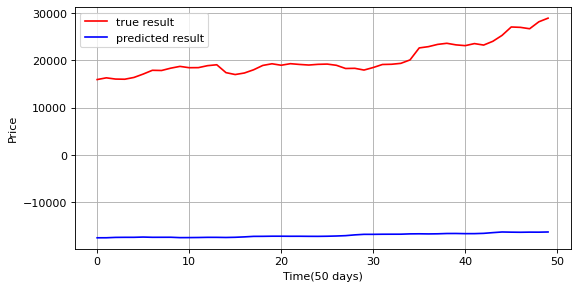

In [ ]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(data_test,color="r",label="true result")
plt.plot(predicted_data,color="b",label="predicted result")
plt.legend()
plt.xlabel("Time(50 days)")
plt.ylabel("Price")
plt.grid(True)
plt.show()

### LSTM Model

##### Creating a second model with only the LSTM cell. 
Not adding extra features to fight unstable gradient problems. 
LSTM cells are supposed to perform much better; training should converge faster, and it should detect long-term dependencies in the data. 


In [ ]:
model2=Sequential()
model2.add(LSTM(10,input_shape=(None,1)))
model2.add(Dense(1))

model2.compile(loss="mean_squared_error",optimizer="adam")
model2.fit(x_train,y_train,epochs=25,batch_size=32)

Epoch 1/25
100/100 [==============================] - 30s 4ms/step - loss: 0.0379
Epoch 2/25
100/100 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 3/25
100/100 [==============================] - 0s 4ms/step - loss: 8.6522e-04
Epoch 4/25
100/100 [==============================] - 0s 4ms/step - loss: 7.7272e-04
Epoch 5/25
100/100 [==============================] - 0s 4ms/step - loss: 6.1220e-04
Epoch 6/25
100/100 [==============================] - 0s 4ms/step - loss: 6.4738e-04
Epoch 7/25
100/100 [==============================] - 0s 4ms/step - loss: 4.8858e-04
Epoch 8/25
100/100 [==============================] - 0s 4ms/step - loss: 5.0152e-04
Epoch 9/25
100/100 [==============================] - 0s 4ms/step - loss: 4.3459e-04
Epoch 10/25
100/100 [==============================] - 0s 4ms/step - loss: 3.8678e-04
Epoch 11/25
100/100 [==============================] - 0s 4ms/step - loss: 4.5870e-04
Epoch 12/25
100/100 [==============================] - 0s 4ms/step - l

In [ ]:
x_test=[]
for i in range(timestep,inputs.shape[0]):
    x_test.append(inputs[i-timestep:i,0])
x_test=np.array(x_test)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [ ]:
predicted_data=model2.predict(x_test)
predicted_data=scaler.inverse_transform(predicted_data)

In [ ]:
data_test=np.array(X_test)
data_test=data_test.reshape(len(X_test),1)

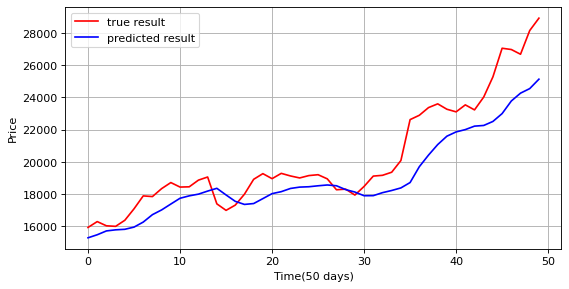

In [ ]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(data_test,color="r",label="true result")
plt.plot(predicted_data,color="b",label="predicted result")
plt.legend()
plt.xlabel("Time(50 days)")
plt.ylabel("Price")
plt.grid(True)
plt.show()

### We can see for forecasting, using RNN model with the LSTM cells can lead to great results. But this model isn't great to predict the price of bitcoin for next 50 days at once. It's only performing so good because it can use the input from the previous run. 

**All 50 at Once**

Up until this point, the project involved predicting one at a time and using the true value to predict again until 50 predictions were made. In this next part of the project we try to predict all 50 values without any information besides the training set. There were three ways used to predict all 50 values. The first used a sequence-to-vector model that predicted values 50 to 99 using values 0 to 49. Below are the results of this method.

In [ ]:
data_m = data

In [ ]:
data = np.array(data)
data = np.reshape(data, (data.shape[0], 1))
data.shape

(3286, 1)

In [ ]:
test_dates = 50
training_set=data[:len(data)-test_dates]
dataset_test=data[len(data)-test_dates:]
print(training_set.shape, dataset_test.shape)

(3236, 1) (50, 1)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
X_train = []
y_train = []
for i in range(50, 3236-50):
    X_train.append(training_set_scaled[i-50:i, 0])
    y_train.append(training_set_scaled[i:i+50, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape, y_train.shape)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape, y_train.shape)

(3136, 50) (3136, 50)
(3136, 50, 1) (3136, 50)


In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape=(None, 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=50))

model.compile(optimizer='adam',loss='mean_squared_error')

model.fit(X_train,y_train,epochs=40,batch_size=32)

Epoch 1/40
98/98 [==============================] - 5s 11ms/step - loss: 0.0379
Epoch 2/40
98/98 [==============================] - 1s 10ms/step - loss: 0.0076
Epoch 3/40
98/98 [==============================] - 1s 10ms/step - loss: 0.0058
Epoch 4/40
98/98 [==============================] - 1s 10ms/step - loss: 0.0055
Epoch 5/40
98/98 [==============================] - 1s 10ms/step - loss: 0.0049
Epoch 6/40
98/98 [==============================] - 1s 10ms/step - loss: 0.0051
Epoch 7/40
98/98 [==============================] - 1s 10ms/step - loss: 0.0047
Epoch 8/40
98/98 [==============================] - 1s 10ms/step - loss: 0.0042
Epoch 9/40
98/98 [==============================] - 1s 10ms/step - loss: 0.0045
Epoch 10/40
98/98 [==============================] - 1s 10ms/step - loss: 0.0048
Epoch 11/40
98/98 [==============================] - 1s 10ms/step - loss: 0.0046
Epoch 12/40
98/98 [==============================] - 1s 10ms/step - loss: 0.0044
Epoch 13/40
98/98 [==================

In [ ]:
X_test=data[len(data)-test_dates-50:len(data)-test_dates]
X_test = np.reshape(X_test, (1, X_test.shape[0], 1))

In [ ]:
y_test = dataset_test

In [ ]:
model_50_at_once = model

In [ ]:
predicted_stock_price = model_50_at_once.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price = np.reshape(predicted_stock_price, (50,1))

In [ ]:
real_stock_price = data[len(data)-test_dates:]
real_stock_price.shape

(50, 1)

The hyperparameters of this model were 4 LSTM layers with 50 units each and a 20% dropout layer after each of them. A final dense layer with 50 units was used, because there were 50 forescasts to be made.

This model deviated quite strongly after about 3 time steps. The gap between the true value and the predicted value grew to 22,000. This model clearly has very low predictive power after a few time steps and it is not to be trusted at all for 50 step prediction.

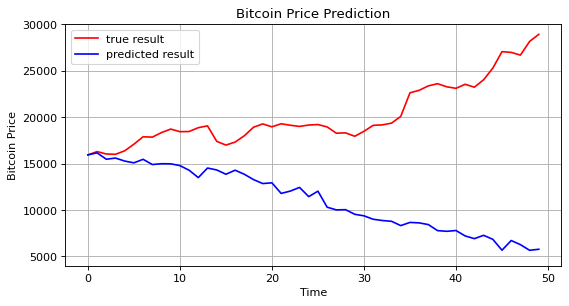

In [ ]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
axes = plt.gca()
axes.set_ylim([4000,30000])
plt.plot(real_stock_price, color="r",label="true result")
plt.plot(predicted_stock_price, color="b",label="predicted result")
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.grid(True)
plt.legend()
plt.show()

**Forecast Next 50 Values at Each and Every Time Step**

Instead of forecasting the next 50 values only at the last time step, the next method we implemented was to forecast 50 values at each and every time step. That is to say, at time step 0 the model would forecast 1 to 50, at time step 1 it would forecast 2 to 51, and so on until time step 49 where it would forecast our target values of 50 to 99. This meant that there would be many more error gradients running through the model. The errors gradients would also flow from the outputs at each time step which should help it stabilize and run faster.

In [ ]:
##((7000, 50, 1), (7000, 50, 10)): X train, y_train shape
##(1, 50, 1) (1, 10, 1): X_new, y_new shape

In [ ]:
X_new=training_set_scaled[len(training_set_scaled)-test_dates:]
X_new = np.reshape(X_new, (1, X_new.shape[0], 1))
print(X_new.shape)

(1, 50, 1)


In [ ]:
data_timestep = []
n_steps = 50
timesteps = 50


for i in range(n_steps+timesteps, 3236):
    data_timestep.append(training_set_scaled[i-n_steps-timesteps:i, 0])
data_timestep = np.array(data_timestep)
print(data_timestep.shape)
data_timestep = np.reshape(data_timestep, (data_timestep.shape[0], data_timestep.shape[1], 1))
print(data_timestep.shape)

(3136, 100)
(3136, 100, 1)


In [ ]:
X_train = data_timestep[:, :n_steps]
X_train.shape

(3136, 50, 1)

In [ ]:
Y = np.empty((len(data_timestep), n_steps, timesteps))
for step_ahead in range(1, timesteps + 1):
    Y[..., step_ahead - 1] = data_timestep[..., step_ahead:step_ahead + n_steps, 0]

y_train = Y
X_train.shape, y_train.shape

((3136, 50, 1), (3136, 50, 50))

In [ ]:
def last_time_step_mse(Y_true, Y_pred):
    return mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=[None, 1]),
    Dropout(0.2),
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    TimeDistributed(Dense(50))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, y_train, epochs=40)

Epoch 1/40
98/98 [==============================] - 5s 12ms/step - loss: 0.0412 - last_time_step_mse: 0.0378
Epoch 2/40
98/98 [==============================] - 1s 11ms/step - loss: 0.0087 - last_time_step_mse: 0.0061
Epoch 3/40
98/98 [==============================] - 1s 11ms/step - loss: 0.0064 - last_time_step_mse: 0.0049
Epoch 4/40
98/98 [==============================] - 1s 11ms/step - loss: 0.0056 - last_time_step_mse: 0.0048
Epoch 5/40
98/98 [==============================] - 1s 11ms/step - loss: 0.0045 - last_time_step_mse: 0.0042
Epoch 6/40
98/98 [==============================] - 1s 11ms/step - loss: 0.0045 - last_time_step_mse: 0.0042
Epoch 7/40
98/98 [==============================] - 1s 11ms/step - loss: 0.0042 - last_time_step_mse: 0.0040
Epoch 8/40
98/98 [==============================] - 1s 11ms/step - loss: 0.0040 - last_time_step_mse: 0.0037
Epoch 9/40
98/98 [==============================] - 1s 11ms/step - loss: 0.0039 - last_time_step_mse: 0.0041
Epoch 10/40
98/98 [

In [ ]:
model_at_every_ts = model

In [ ]:
predicted_stock_price = model_at_every_ts.predict(X_new)[:, -1][..., np.newaxis]
predicted_stock_price = np.reshape(predicted_stock_price, (1,50))
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price = np.reshape(predicted_stock_price, (50,1))
predicted_stock_price.shape

(50, 1)

Similarly to the previous model, the hyperparameters for this model were 4 LSTM layers with 50 outputs each and a 20% dropout layer following each of them. The final layer was a time distributed dense layer with 50 outputs since there were 50 forecasts at every time step.

The predictions from this model were not as close as the previous ones for the first few time steps, but the end prediction was about 5,000 closer than the previous model. Still the gap between the true value and predicition of about 18,000 is very large and shows how this is also not a good model for this kind of data.

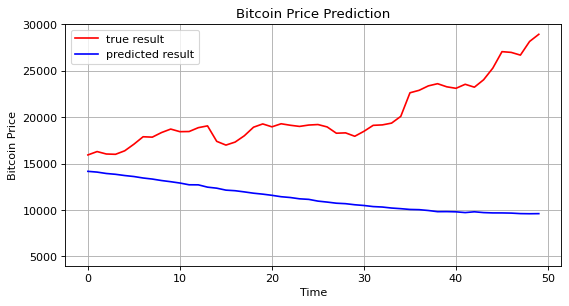

In [ ]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
axes = plt.gca()
axes.set_ylim([4000,30000])
plt.plot(real_stock_price, color="r",label="true result")
plt.plot(predicted_stock_price, color="b",label="predicted result")
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.grid(True)
plt.legend()
plt.show()

**WaveNet**

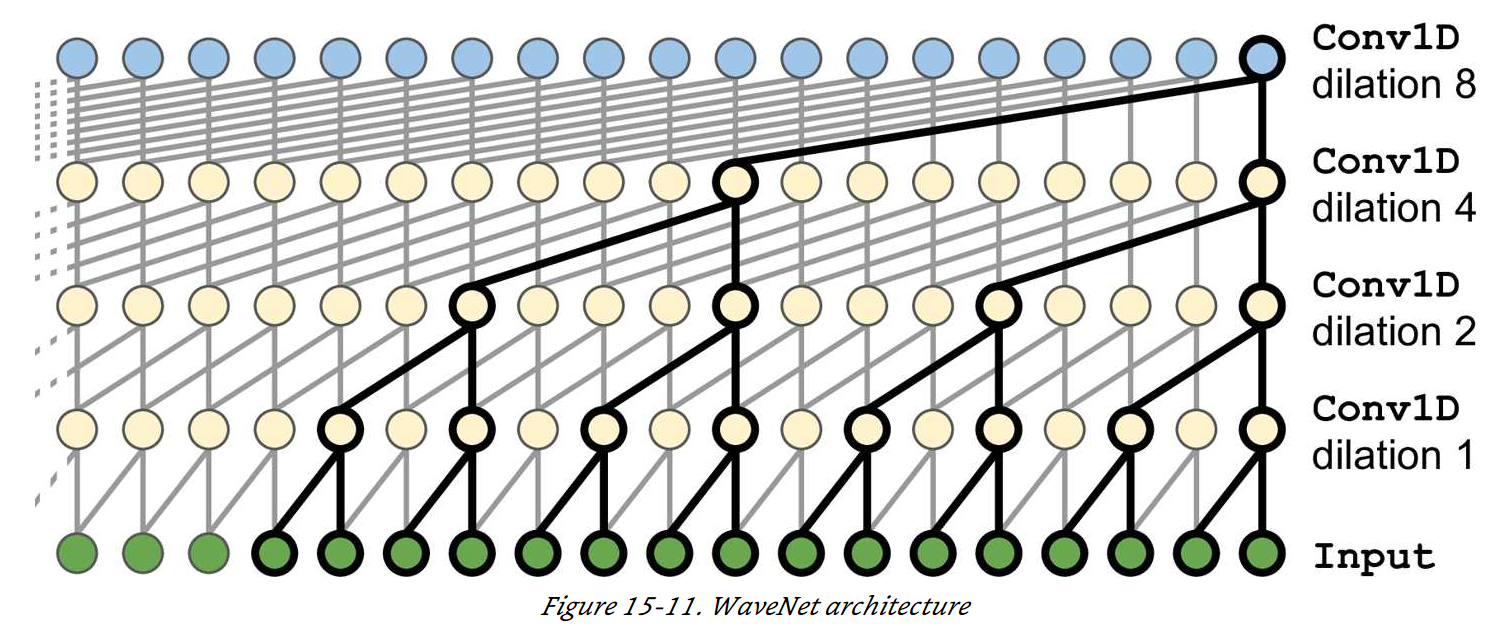

Lastly, a model that uses 1-dimensional convolutional layers was attempted. The main principle in WaveNet is a stack of 1-dimensional convolutional layers that have a doubling dilation rate which determines how much each layer can see. The first layer see two time steps, while the second layer sees four, the third sees eight and so on. This way lower layers learn short-term patterns while higher layers learn long-term

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = Sequential()
model.add(InputLayer(input_shape=[None, 1]))
for rate in (1, 2, 4, 8, 16, 32) * 2:
    model.add(Conv1D(filters=300, kernel_size=2, padding="causal",
                                  activation="relu", dilation_rate=rate))
model.add(Conv1D(filters=50, kernel_size=1))
model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, y_train, epochs=40)

Epoch 1/40
98/98 [==============================] - 6s 29ms/step - loss: 0.0279 - last_time_step_mse: 0.0285
Epoch 2/40
98/98 [==============================] - 3s 29ms/step - loss: 0.0046 - last_time_step_mse: 0.0050
Epoch 3/40
98/98 [==============================] - 3s 29ms/step - loss: 0.0042 - last_time_step_mse: 0.0044
Epoch 4/40
98/98 [==============================] - 3s 29ms/step - loss: 0.0033 - last_time_step_mse: 0.0033
Epoch 5/40
98/98 [==============================] - 3s 29ms/step - loss: 0.0029 - last_time_step_mse: 0.0028
Epoch 6/40
98/98 [==============================] - 3s 29ms/step - loss: 0.0029 - last_time_step_mse: 0.0025
Epoch 7/40
98/98 [==============================] - 3s 29ms/step - loss: 0.0031 - last_time_step_mse: 0.0027
Epoch 8/40
98/98 [==============================] - 3s 29ms/step - loss: 0.0026 - last_time_step_mse: 0.0020
Epoch 9/40
98/98 [==============================] - 3s 29ms/step - loss: 0.0026 - last_time_step_mse: 0.0022
Epoch 10/40
98/98 [

In [ ]:
model_wave = model

In [ ]:
predicted_stock_price = model.predict(X_new)[:, -1][..., np.newaxis]
predicted_stock_price = np.reshape(predicted_stock_price, (1,50))
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price = np.reshape(predicted_stock_price, (50,1))
predicted_stock_price.shape
predicted_stock_price.shape

(50, 1)

The hyperparameters for this model were 6 1-dimensional convolutional each with 300 filters, kernel size 2, and casual padding. The output layer was also a 1-dimensional convolutional layer with 50 filters, because there were 50 predictions. This was run for 40 epochs. 

This model was better than the previous two. Although it wasn't as close for the first few predictions it stayed closer throughout and finished closer to the true value than the preious two models. It also predicted a slight ascent at about time step 20, which was notable considering the other two were essentially downward sloping. Still, this model did not provide acceptable forescast since the gap between true and predicted price was large.

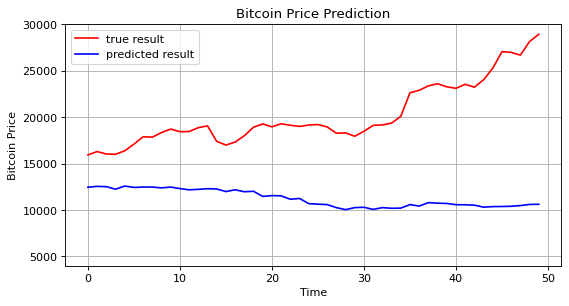

In [ ]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
axes = plt.gca()
axes.set_ylim([4000,30000])
plt.plot(real_stock_price, color="r",label="true result")
plt.plot(predicted_stock_price, color="b",label="predicted result")
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.grid(True)
plt.legend()
plt.show()

**Conclusion**

None of the models trying to predict 50 values in the future all at once managed to give satisfactory results. This was very dissapointing, but it was also very expected. This is because even a model that is slightly better than 50% at predicting the stock market would make money in the long run. A few of the areas of interest that could muster better results would be attempting a different model such as one that predicts one-by-one for 50 time steps but recalibrates based on the prediction. LSTM has also fallen out of favor in stock prediction, so other more recent architectures might be worth investigating. There is also more traditional models such as ARIMA that are simple to use and do not need as many observations. 